In [ ]:
#http://jsienkiewicz.pl/TEXT/lab/zad.html#zad1
#import libraries
library(magrittr)
library(tibble)
library(gutenbergr)
library(dplyr)
library(tidytext)
library(ggplot2)

In [2]:
gutenberg_works(languages = "en", author =="Joyce, James")

gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>
2814,Dubliners,"Joyce, James",1039,en,Banned Books from Anne Haight's list,Public domain in the USA.,TRUE
2817,Chamber Music,"Joyce, James",1039,en,NA,Public domain in the USA.,TRUE
4217,A Portrait of the Artist as a Young Man,"Joyce, James",1039,en,NA,Public domain in the USA.,TRUE
4300,Ulysses,"Joyce, James",1039,en,Banned Books from Anne Haight's list/Erotic Fiction/Best Books Ever Listings,Public domain in the USA.,TRUE


In [3]:
#ulisses
dfUl <- gutenberg_download(4300)
dfUl.words <- dfUl %>%
    unnest_tokens(word, text)
#ulisses without stop words
dfUl.wordsClean <- dfUl.words %>%
    anti_join(stop_words)

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org

Joining, by = "word"


In [4]:
library(stringr)
gutenberg_works(languages = "en", author =="Verne, Jules", str_detect(title, "Leagues"))

gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<lgl>
164,Twenty Thousand Leagues under the Sea,"Verne, Jules",60,en,Science Fiction,Public domain in the USA.,TRUE
2488,Twenty Thousand Leagues Under the Seas: An Underwater Tour of the World,"Verne, Jules",60,en,Science Fiction/Movie Books,Public domain in the USA.,TRUE
3091,Eight Hundred Leagues on the Amazon,"Verne, Jules",60,en,NA,Public domain in the USA.,TRUE


In [5]:
#twenty thousand leagues
dfTw <- gutenberg_download(164)
dfTw.words <- dfTw %>%
    unnest_tokens(word, text)

dfTw.wordsClean <- dfTw.words %>%
    anti_join(stop_words)

Joining, by = "word"


In [6]:
#define function for priting graphs of words
graphWords <- function(dfWords, label) {
    dfWords %>%
        count(word, sort = TRUE) %>%
        mutate(word1 = reorder(word, n)) %>%
        top_n(10, n) %>%
        ggplot() +
        geom_col(aes(word1, n)) +
        coord_flip() +
      xlab(label) + ylab("n")
}


In [7]:
plotUl <- graphWords(dfUl.words, "Ulisses")
plotUlCl <- graphWords(dfUl.wordsClean, "Ulisses (w\\o stop words)")
plotTw <- graphWords(dfTw.words, "20k Leagues")
plotTwCl <- graphWords(dfTw.wordsClean, "20k Leagues (w\\o stop words)")

Saving 7 x 7 in image



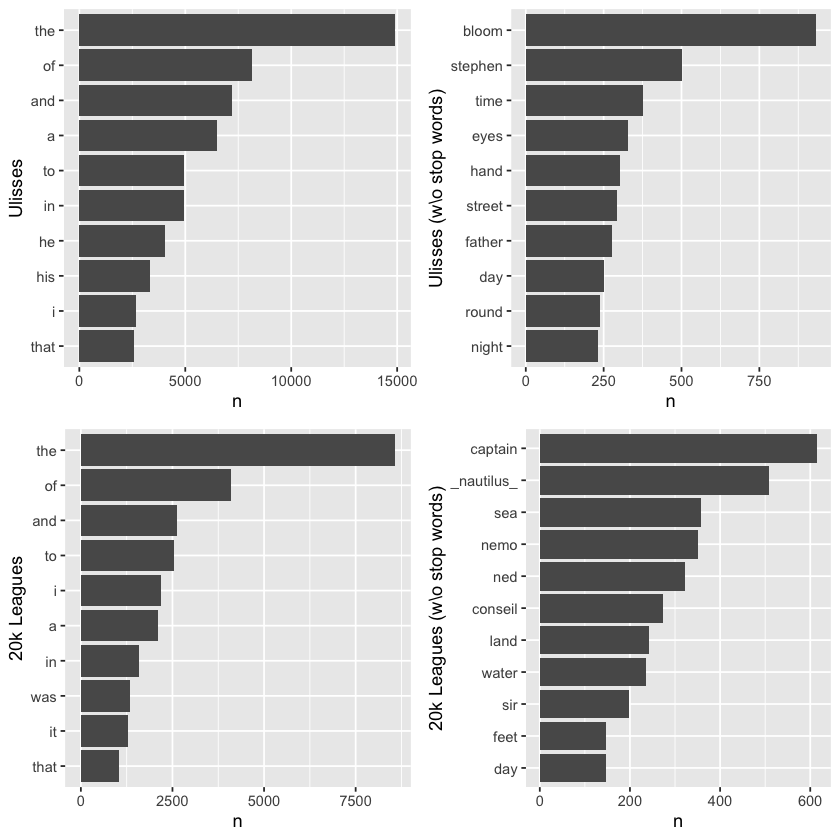

In [11]:
library(gridExtra)
grid.arrange(plotUl, plotUlCl, plotTw, plotTwCl, nrow = 2)
g <- arrangeGrob(plotUl, plotUlCl, plotTw, plotTwCl, nrow=2) #generates g
ggsave(file="words.png", g)